A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Alphanumeric characters include letters and numbers.

Given a string s, return true if it is a palindrome, or false otherwise.

In [6]:
s = "A man, a plan, a canal: Panama"
string = ""

for i in s:
    if i.isalnum():
        string += i.lower()

print(string)
if string[::-1] == string:
    print("Yes, it's a palindrome")

amanaplanacanalpanama
Yes, it's a palindrome


In [7]:
def isPalindrome(string):
    s = ""
    for i in string:
        if i.isalnum():
            s += i.lower()
    return s[::-1] == s

print(isPalindrome(s))
print(isPalindrome("boob"))
print(isPalindrome("lazy"))

True
True
False


Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number. Let these two numbers be numbers[index1] and numbers[index2] where 1 <= index1 < index2 <= numbers.length.

Return the indices of the two numbers, index1 and index2, added by one as an integer array [index1, index2] of length 2.

The tests are generated such that there is exactly one solution. You may not use the same element twice.

Your solution must use only constant extra space.

In [8]:
numbers = [2,7,11,15]; target = 9
# Output: [1,2]

def TwoSum(numbers, target):
    left, right = 0, len(numbers) - 1
    while left < right:
        current_sum = numbers[left] + numbers[right]
        if current_sum > target: right -= 1
        elif current_sum < target: left += 1
        else: 
            return [left + 1, right + 1]
    return []

print(TwoSum(numbers, 13))
print(TwoSum(numbers, 9))

[1, 3]
[1, 2]


Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

__Notice that the solution set must not contain duplicate triplets.__

nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0. <br>
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0. <br>
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0. <br>
The distinct triplets are [-1,0,1] and [-1,-1,2]. <br><br>
__Also, the order of the output and the order of the triplets does not matter.__

In [9]:
nums = [-1,0,1,2,-1,-4]
# Output: [[-1,-1,2],[-1,0,1]]

result = []
nums.sort()
print(f"nums sorted: {nums}\n")
for index, number in enumerate(nums):
    # If positives, break. Because adding any positives won't result in 0, but > 0
    if number > 0: break
    # If the previous number is duplicate, skip.
    if index > 0 and number == nums[index -1]: continue

    left, right = index + 1, len(nums) - 1
    while left < right:
        # number: current number, consider -4
        # nums[left]: -1
        # nums[right]: 2
        # total = -3
        # total should be 0
        total = number + nums[left] + nums[right]
        if total > 0: right -= 1
        elif total < 0: left += 1
        elif total == 0:
            result.append([number, nums[left], nums[right]])
            left += 1; right -= 1
            # Skipping duplicates from the triplets
            while nums[left] == nums[left - 1] and left < right:
                left += 1

print(result)

nums sorted: [-4, -1, -1, 0, 1, 2]

[[-1, -1, 2], [-1, 0, 1]]


In [10]:
def threeSum(nums):
    result = []
    nums.sort()
    
    for index, number in enumerate(nums):
        if number > 0: break
        if index > 0 and number == nums[index -1]: continue

        left, right = index + 1, len(nums) - 1
        while left < right:
            total  = number + nums[left] + nums[right]
            if total < 0: left += 1
            elif total > 0: right -= 1
            else:
                result.append([number, nums[left], nums[right]])
                left += 1; right -= 1
                while nums[left] == nums[left - 1] and left < right:
                    left += 1
    return result

threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water. Return the maximum amount of water a container can store. __Notice that you may not slant the container.__

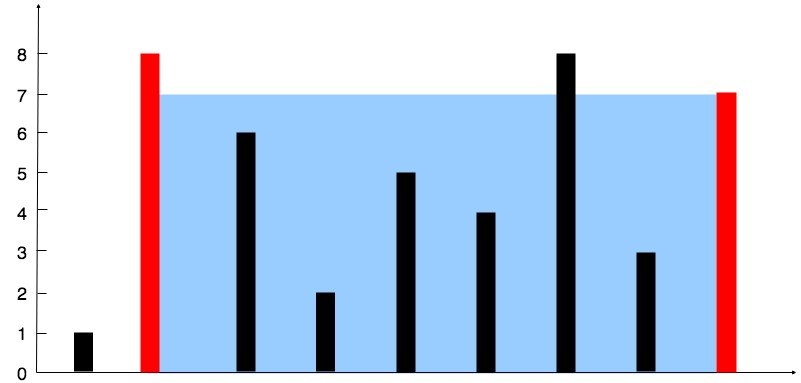

In [13]:
height = [1,8,6,2,5,4,8,3,7]

result = 0
# len(height) is out of range here, tf, it's len(height) - 1
left, right = 0, len(height) - 1

while left < right:
    width = right - left
    area = min(height[left], height[right])
    result = max(result, area * width)
    if height[left] < height[right]:
        left += 1
    elif height[left] > height[right]:
        right -= 1
    elif height[left] == height[right]:
        left += 1
        
print(result)

49


In [12]:
def maxContainer(height):
    result = 0
    left, right = 0, len(height) - 1
    while left < right:
        result = max(result, min(height[left], height[right]) * (right - left))
        if height[left] > height[right]: right -= 1
        elif height[left] < height[right]: left += 1
        else: left += 1
    return result

maxContainer(height=height)

49

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.<br>
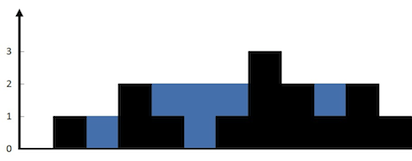

Input: height = [0,1,0,2,1,0,1,3,2,1,2,1] <br>
Output: 6 <br>
Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.

In [34]:
blocks = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]

left, right = 0, len(blocks) - 1
leftMax, rightMax = blocks[left], blocks[right] 
water_count = 0

print(f"Initial leftMax: {leftMax}, rightMax: {rightMax}")
print("\n")

while left < right:
    if leftMax < rightMax:
        print(f"Current blocks: {blocks}")
        print(f"Comparing leftMax and rightMax: {leftMax} < {rightMax}")
        print(f"Current left index: {left}")
        left += 1
        print(f"Incrementing left index: {left}")
        print(f"Previous leftMax: {leftMax}, Current block height at left: {blocks[left]}")
        leftMax = max(leftMax, blocks[left])
        print(f"Updating leftMax to the maximum of previous leftMax and current block height: {leftMax}")
        water_count += leftMax - blocks[left]
        print(f"Adding water trapped at this position to water_count: {water_count}")
        print("\n")
    else:
        print(f"Current blocks: {blocks}")
        print(f"Comparing leftMax and rightMax: {leftMax} >= {rightMax}")
        print(f"Current right index: {right}")
        right -= 1
        print(f"Decrementing right index: {right}")
        print(f"Previous rightMax: {rightMax}, Current block height at right: {blocks[right]}")
        rightMax = max(rightMax, blocks[right])
        print(f"Updating rightMax to the maximum of previous rightMax and current block height: {rightMax}")
        water_count += rightMax - blocks[right]
        print(f"Adding water trapped at this position to water_count: {water_count}")
        print("\n")

print(f"Total Water Count: {water_count}")

Initial leftMax: 0, rightMax: 1


Current blocks: [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
Comparing leftMax and rightMax: 0 < 1
Current left index: 0
Incrementing left index: 1
Previous leftMax: 0, Current block height at left: 1
Updating leftMax to the maximum of previous leftMax and current block height: 1
Adding water trapped at this position to water_count: 0


Current blocks: [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
Comparing leftMax and rightMax: 1 >= 1
Current right index: 11
Decrementing right index: 10
Previous rightMax: 1, Current block height at right: 2
Updating rightMax to the maximum of previous rightMax and current block height: 2
Adding water trapped at this position to water_count: 0


Current blocks: [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
Comparing leftMax and rightMax: 1 < 2
Current left index: 1
Incrementing left index: 2
Previous leftMax: 1, Current block height at left: 0
Updating leftMax to the maximum of previous leftMax and current block height: 1
Adding water trapped a

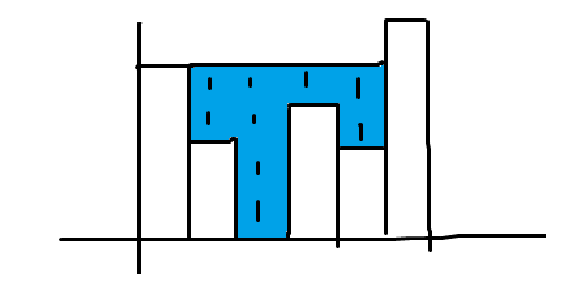

In [35]:
def trapWater(blocks):
    left, right = 0, len(blocks) -1 
    leftMax, rightMax = blocks[left], blocks[right]
    water_count = 0
    
    while left < right:
        if leftMax < rightMax:
            left += 1
            leftMax = max(leftMax, blocks[left])
            water_count += leftMax - blocks[left]
        else:
            right -= 1
            rightMax = max(rightMax, blocks[right])
            water_count += rightMax - blocks[right]

    return water_count

trapWater(blocks=[4,2,0,3,2,5])

9